In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
# Importing packages and data
from time import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

## Loading a9a and a9a.t

In [2]:
N_FEATURES = 123
X_train, y_train = load_svmlight_file('a9a.txt', n_features=N_FEATURES)
X_test, y_test = load_svmlight_file('a9a.t', n_features=N_FEATURES)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)


# XGBoost

1. n estimators
2. max depth
3. lambda
4. learning rate
5. missing
6. objective

## Description: XGBoost
Most serious ML practitioners are already familiar, or at least have heard of XGBoost (short for EXtreme Gradient Boosting). XGBoost is a gradient boosting library that came to fame after winning the Kaggle Higgs Machine Learning Challenge in 2014. This library became popular for several reasons:
It implemented very effective regularization hyperparameters on the underlying trees.
It was built to be highly scalable, utilizing distributed computing to process extremely large data sets.
It is available in many different languages (such as Python, R, C, C++, Ruby, Julia, etc.).
XGBoost still does quite well in modern competitions, and the XGBoost community has done a great job of maintaining the packages and adding new features. However, it is facing some competition from other boosting libraries such as LightGBM and CatBoost. One disadvantage of the XGBoost library is that it doesn’t have any special treatment of categorical features like its competitors. This is unfortunate, as boosting libraries tend to excel in tabular data, which often includes discrete features. However, in our comparison this will not matter, as our TFIDF representation contains only continuous value features.

Boosting basic ideas: Boosting refers to a general and provably effective method of producing a very accurate classifier by combining by combining rough and moderately inaccurate rules of thumb. Instead of learning a single (weak) classifier, learn many weak classifiers that are good at different parts of the input space.


Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

# training methodology
1. Get the default parameter from offical document 
2. Set the default as the constant, each time using 5-fold cross evulation to figure out one optimal parameteres based on default value; In other word, set one parameter as a variable and the rest of parameter as constants. The step is to narrow the range of input parameters.
3. repeat #2 k times to get approximate optimal parameters of range (k is the number of parameter to fine turning)
4. combine every improved parameters together then evaluate the model and output the result
5. random input parameters in the decision range to see whether get a better performance

## default parameter

In [3]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [4]:
print(f"n estimators = {xgb.n_estimators}")
print(f"max depth = {xgb.max_depth}")
print(f"lambda = {xgb.reg_lambda}")
print(f"learning rate = {xgb.learning_rate}")
print(f"missing = {xgb.missing}")
print(f"objective = {xgb.objective}")

n estimators = 100
max depth = None
lambda = None
learning rate = None
missing = nan
objective = binary:logistic


In [5]:
default_xgb = xgb.fit(X_train, y_train)
default_xgb_error = 1-float(default_xgb.score(X_train, y_train))
print(f"default_xgb_error = {default_xgb_error}");

default_xgb_error = 0.12139127764127766


In [6]:
#referene: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html
print(f"n estimators = {100}")
print(f"max depth = {6}")
print(f"lambda = {1}")
print(f"learning rate = {0.3}")
print(f"missing = {xgb.missing}")
print(f"objective = {xgb.objective}")

n estimators = 100
max depth = 6
lambda = 1
learning rate = 0.3
missing = nan
objective = binary:logistic


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

## Using K-fold cross-validation to get better learning_rate

In [8]:
from sklearn.model_selection import cross_val_score

valid_s = []
train_s = []


for i in range(11):

    xgb = XGBClassifier(
                        learning_rate = i/10.0,
                        gpu_id = 1
                       )
    tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
    v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
    
    train_s.append(tr_s.mean())
    valid_s.append(v_s.mean())

[20:57:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[20:57:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:57:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

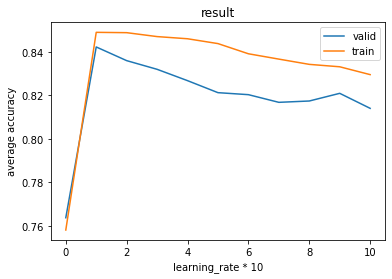

In [9]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("learning_rate * 10")

axs.plot(range(11),valid_s,label="valid")
axs.plot(range(11),train_s,label="train")
axs.legend()

In [10]:
train_min_learning_rate = train_s.index(max(train_s))
valid_min_learning_rate = valid_s.index(max(valid_s))
print(f'learning_rate in training data: {train_min_learning_rate/10.0} \t error: {1.0 - max(train_s)}')
print(f'learning_rate in valid data: {valid_min_learning_rate/10.0} \t error: {1.0 - max(valid_s)}')

learning_rate in training data: 0.1 	 error: 0.15095179648099089
learning_rate in valid data: 0.1 	 error: 0.15768503029167003


In [11]:
improved_learning_rate = train_min_learning_rate/10.0

## Using K-fold cross-validation to get better max_depth

In [12]:
valid_s = []
train_s = []


for i in range(3, 20):

    xgb = XGBClassifier(
                        max_depth = i,
                        gpu_id = 1
                       )
    tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
    v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
    
    train_s.append(tr_s.mean())
    valid_s.append(v_s.mean())

[20:58:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[20:58:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:58:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[20:59:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[20:59:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[21:00:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0


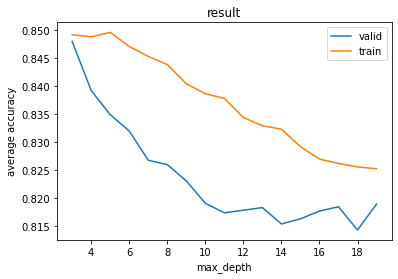

In [13]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("max_depth")

axs.plot(range(3, 20),valid_s,label="valid")
axs.plot(range(3, 20),train_s,label="train")
axs.legend()

In [14]:
print(train_s)

[0.8492017912302237, 0.8488179067014163, 0.8496241445394415, 0.8470902678775735, 0.8453243518802722, 0.8438653312644695, 0.8404486992651504, 0.8386825769219006, 0.8378381798223877, 0.8344211277616733, 0.8329624756207789, 0.8323483016438772, 0.8292385650260566, 0.8270120038070827, 0.8262441979019777, 0.8256300091860794, 0.8252842986577564]


In [15]:
train_max_depth = train_s.index(max(train_s))
valid_max_depth = valid_s.index(max(valid_s))
print(f'max_depth in training data: {train_max_depth+3} \t error: {1.0 -max(train_s)}')
print(f'max_depth in valid data: {valid_max_depth+3} \t error: {1.0 - max(valid_s)}')

max_depth in training data: 5 	 error: 0.15037585546055854
max_depth in valid data: 3 	 error: 0.15200417799878108


In [16]:
improved_max_depth = train_max_depth+3

## Using K-fold cross-validation to get better reg_lambda

In [17]:
valid_s = []
train_s = []


for i in range(11):

    xgb = XGBClassifier(
                        reg_lambda = i/10.0,
                        gpu_id = 1
                       )
    tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
    v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
    
    train_s.append(tr_s.mean())
    valid_s.append(v_s.mean())

[21:00:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[21:00:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:00:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

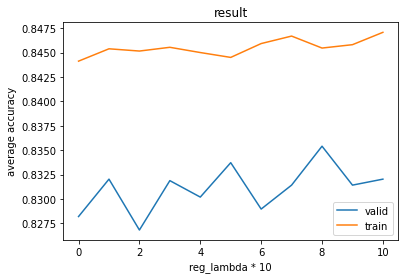

In [18]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("reg_lambda * 10")

axs.plot(range(11),valid_s,label="valid")
axs.plot(range(11),train_s,label="train")
axs.legend()

In [19]:
train_max_reg_lambda = train_s.index(max(train_s))
valid_max_reg_lambda = valid_s.index(max(valid_s))
print(f'reg_lambda in training data: {train_max_reg_lambda/10.0} \t error: {1.0 - max(train_s)}')
print(f'reg_lambda in valid data: {valid_max_reg_lambda/10.0} \t error: {1.0 - max(valid_s)}')

reg_lambda in training data: 1.0 	 error: 0.15290973212242653
reg_lambda in valid data: 0.8 	 error: 0.16459311078180683


In [20]:
improved_reg_lambda = train_max_reg_lambda/10.0

## Using K-fold cross-validation to get better objective function

In [21]:
valid_s = []
train_s = []

option_objective = ["reg:logistic","binary:logistic"]
for i in option_objective:

    xgb = XGBClassifier(
                        objective = i,
                        gpu_id = 1
                       )
    tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
    v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
    
    train_s.append(tr_s.mean())
    valid_s.append(v_s.mean())

[21:01:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

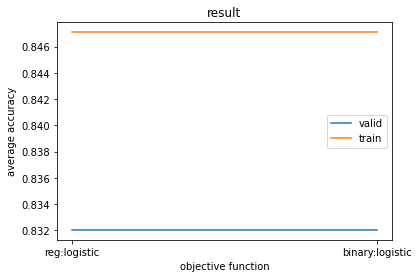

In [22]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("objective function")

axs.plot(option_objective,valid_s,label="valid")
axs.plot(option_objective,train_s,label="train")
axs.legend()

In [23]:
train_opt_objective = train_s.index(max(train_s))
valid_opt_objective = valid_s.index(max(valid_s))
print(f'objective function in training data: {option_objective[train_opt_objective]} \t error: {1.0 - max(train_s)}')
print(f'objective function in valid data: {option_objective[valid_opt_objective]} \t error: {1.0 - max(valid_s)}')

objective function in training data: reg:logistic 	 error: 0.15290973212242653
objective function in valid data: reg:logistic 	 error: 0.16797264495380504


In [24]:
improved_objective = option_objective[train_opt_objective]

## Using K-fold cross-validation to get better n_estimators

In [25]:

valid_s = []
train_s = []

for i in range(40,150,10):

    xgb = XGBClassifier(n_estimators = i,
                        gpu_id = 1
                        
                       )
    tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
    v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
    
    train_s.append(tr_s.mean())
    valid_s.append(v_s.mean())


[21:01:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

[21:01:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:01:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

In [26]:
    
print(valid_s)
print(train_s)
print(len(valid_s))

[0.8400122369151657, 0.8392450129855126, 0.8380164880053474, 0.838476374383586, 0.8372479672927771, 0.8357119868718413, 0.832027355046195, 0.8327958757587653, 0.8321819079920731, 0.8314143303943518, 0.8303395331345719]
[0.8474741229283881, 0.8476660909860352, 0.8475508836212535, 0.8482419656809841, 0.8468983219284208, 0.8467831219331373, 0.8470902678775735, 0.8459385258571739, 0.8459001602497376, 0.8462840521480428, 0.8459001012937521]
11


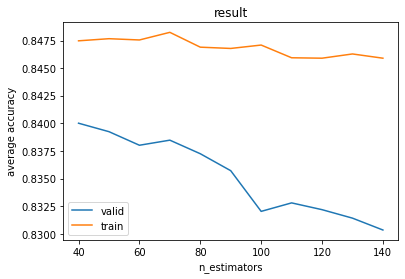

In [27]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("n_estimators")

axs.plot(range(40,150,10),valid_s,label="valid")
axs.plot(range(40,150,10),train_s,label="train")
axs.legend()

In [28]:
train_min_id = train_s.index(max(train_s))
valid_min_id = valid_s.index(max(valid_s))
print(f'Best n_estimators in training data: {train_min_id*10 + 40} \t error: {1.0-max(train_s)}')
print(f'Best n_estimators in test data: {valid_min_id*10+40} \t error: {1.0-max(valid_s)}')

Best n_estimators in training data: 70 	 error: 0.1517580343190159
Best n_estimators in test data: 40 	 error: 0.1599877630848343


In [29]:
improved_n_estimators = train_min_id*10+40

# Final Result: combine every improved parameter together

In [30]:
print(f"n estimators = {improved_n_estimators}")
print(f"max depth = {improved_max_depth}")
print(f"lambda = {improved_reg_lambda}")
print(f"learning rate = {improved_learning_rate}")
print(f"missing = {xgb.missing}")
print(f"objective = {improved_objective}")

n estimators = 70
max depth = 5
lambda = 1.0
learning rate = 0.1
missing = nan
objective = reg:logistic


# fine tune the parameters about the above number

In [43]:
valid_s = []
train_s = []
xgb = XGBClassifier(
                        n_estimators = 70,
                        max_depth = 5,
                        reg_lambda = 1,
                        learning_rate = 0.1,
                        objective = improved_objective,
                        gpu_id = 1
                        
                       )

tr_s = cross_val_score(xgb, X_train, y_train,cv=5)
v_s = cross_val_score(xgb,X_valid, y_valid,cv=5)
 
train_s.append(tr_s.mean())
valid_s.append(v_s.mean())

train_min_id = train_s.index(max(train_s))
valid_min_id = valid_s.index(max(valid_s))



[21:03:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[21:03:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs

In [44]:
improved_cross_validation_errors = 1.0-max(train_s)
print(f'improved_cross-validation errors: {1.0-max(train_s)}')

improved_cross-validation errors: 0.15317847561193543


In [45]:
improved_xgb = xgb.fit(X_train, y_train)
improved_training_error = 1-float(improved_xgb.score(X_train, y_train))
print(f"improved_xgb_error = {improved_training_error}");

[21:03:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
improved_xgb_error = 0.14473280098280095


In [46]:
improved_test_error = 1.0 - np.mean(improved_xgb.predict(X_test) == y_test)
print(f"improved_test_error = {improved_test_error}")

improved_test_error = 0.1475339352619618


# Reference

## https://en.wikipedia.org/wiki/Gradient_boosting
## https://towardsdatascience.com/boosting-showdown-scikit-learn-vs-xgboost-vs-lightgbm-vs-catboost-in-sentiment-classification-f7c7f46fd956
